In [115]:
from accern_toolbox_3_12_2018 import *
from pandas.tseries.offsets import BDay
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import alphalens
import csv

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
folder_path = '/Users/brad_sun/Downloads/accern/accern_data/'

# Updating of the Strategy Summary Database...

In [166]:
all_strat_results_path = '/Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/all_strat_results_by_3_16.csv'
all_strat_configs_path = '/Users/brad_sun/Dropbox/ACCERN/json_backtest_record/configs/all_strat_configs_by_3_16.csv'
strat_summry_output_path = '/Users/brad_sun/Dropbox/ACCERN/json_backtest_record/strat_summaries/strat_summary_by_3_16.csv'

In [167]:
def combine_all_strat_results_into_one_csv(result_output_file):
    result_path = '/Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/*.csv'
    result_output_file = result_output_file
    files = sorted(glob.glob(result_path)) 
    header_saved = False
    with open(result_output_file,'wb') as fout:
        for filename in files:
            print ('Processing', filename)
            with open(filename) as fin:
                header = next(fin)
                if not header_saved:
                    fout.write(header.encode('utf-8'))
                    header_saved = True
                for line in fin:
                    fout.write(line.encode('utf-8'))

In [168]:
# Write into raw results file:
combine_all_strat_results_into_one_csv(all_strat_results_path)

Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_15_spy_monthly_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_22_earnings_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_22_fixed_leverage_mkt_neutral_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_24_sp500_sum_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_31_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_5_renaissance_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_8_renaissance_initialize_algorithms_table_results.csv
Processing /Users/brad_sun/Dropbox/ACCERN/json_backtest_record/results/1_9_renaissance_initialize_algorithms

In [169]:
def clean_combined_strat_csv(result_output_file):
    read_results = pd.read_csv(result_output_file, error_bad_lines=False)
    read_results = read_results[read_results.algo_id != 'algo_id']
    read_results = read_results[read_results.sharpe != '--']
    read_results.drop(['algo_id'], axis=1, inplace=True)
    read_results.dropna(inplace=True)
    title_to_convert_to_float = ['alpha', 'beta', 'sharpe', 'sortino', 'volatility']
    title_to_strip_pct = ['total_returns', 'benchmark_returns', 'max_drawdown']
    
    for col in title_to_convert_to_float:
        read_results[col] = read_results[col].apply(lambda x: float(x))
    for col in title_to_strip_pct:
        read_results[col] = read_results[col].apply(lambda x: x.strip('%'))
        read_results[col] = read_results[col].apply(lambda x: float(x))
        read_results[col] = read_results[col]/100
    
    pd.options.display.max_colwidth = 100
    read_results.columns = ['algo_name','backtest_id', 'alpha', 'beta', 'sharpe', 'sortino', 'total_returns',
       'benchmark_returns', 'volatility', 'max_drawdown', 'backtest_url']
    read_results.reset_index(inplace=True)
    del read_results['index']
    return read_results

In [170]:
def combine_all_configs(result_output_file):
    path = r'/Users/brad_sun/Dropbox/ACCERN/json_backtest_record/configs/'              
    all_files = sorted(glob.glob(os.path.join(path, "*.csv")))            
    df_from_each_file = (pd.read_csv(f, error_bad_lines=False) for f in all_files)
    concatenated_df = pd.concat(df_from_each_file)
    concatenated_df.to_csv(result_output_file, index = False)
    # '/Users/Brad Sun/Dropbox/ACCERN/json_backtest_record/configs/all_strat_configs_by_2_20.csv'

In [171]:
clean_strat_file = clean_combined_strat_csv(all_strat_results_path)
combine_all_configs(all_strat_configs_path)
configs = pd.read_csv(all_strat_configs_path)
merged = clean_strat_file.merge(configs, on='algo_name')
merged.to_csv(strat_summry_output_path, index = False)
merge_ = pd.read_csv(strat_summry_output_path)

b'Skipping line 2918: expected 12 fields, saw 15\nSkipping line 2919: expected 12 fields, saw 15\nSkipping line 2920: expected 12 fields, saw 15\nSkipping line 2921: expected 12 fields, saw 15\nSkipping line 2922: expected 12 fields, saw 15\nSkipping line 2923: expected 12 fields, saw 15\nSkipping line 2924: expected 12 fields, saw 15\nSkipping line 2925: expected 12 fields, saw 15\nSkipping line 2926: expected 12 fields, saw 15\nSkipping line 2927: expected 12 fields, saw 15\nSkipping line 2928: expected 12 fields, saw 15\nSkipping line 2929: expected 12 fields, saw 15\nSkipping line 2930: expected 12 fields, saw 15\nSkipping line 2931: expected 12 fields, saw 15\nSkipping line 2932: expected 12 fields, saw 15\nSkipping line 2933: expected 12 fields, saw 15\nSkipping line 2934: expected 12 fields, saw 15\nSkipping line 2935: expected 12 fields, saw 15\nSkipping line 2936: expected 12 fields, saw 15\nSkipping line 2937: expected 12 fields, saw 15\nSkipping line 2938: expected 12 fields

# Research and Analysis of Strategy Results

In [188]:
all_strats = pd.read_csv(strat_summry_output_path)
print ('Number of total results in the file: ', len(all_strats))
print ('Snapshot:')
all_strats.head(3)

Number of total results in the file:  3442
Snapshot:


,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,max_drawdown,...,event_relevance_cutoff,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade
0,1_11_conquest_spy_monthly_28,5a59286b466247436e2f769c,0.00,0.70,0.92,1.33,0.4644,0.711,0.10,-0.1259,...,60.0,NaN,10.0,NaN,NaN,NaN,NaN,8/1/13,NaN,NaN
1,1_11_conquest_spy_monthly_26,5a5927efb0aa06452e61276f,0.03,0.43,1.09,1.58,0.4298,0.711,0.08,-0.1263,...,80.0,NaN,10.0,NaN,NaN,NaN,NaN,8/1/13,NaN,NaN
2,1_11_conquest_spy_monthly_24,5a5927ac466247436e2f766c,0.00,0.24,0.48,0.68,0.1223,0.711,0.06,-0.1331,...,60.0,NaN,20.0,NaN,NaN,NaN,NaN,8/1/13,NaN,NaN


In [102]:
# research = all_strats[(all_strats.algo_name.str.contains('3_8'))&(all_strats.algo_name.str.contains('strict'))]

In [189]:
research = all_strats[(all_strats.algo_name.str.contains('3_15_fixing_PA1_dst_close_to_close_'))]

In [190]:
len(research)

50

In [191]:
research

,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,max_drawdown,...,event_relevance_cutoff,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade
2842,3_15_fixing_PA1_dst_close_to_close_100mil_25,5aabd1fc9f85b44118c53491,0.00,-0.92,-1.01,-1.42,0.4430,0.7382,0.12,-0.4973,...,NaN,0.00,NaN,NaN,NaN,50.0,1.00,8/1/13,NaN,NaN
2843,3_15_fixing_PA1_dst_close_to_close_100mil_24,5aabd1dde44121416442af58,0.00,-0.46,-0.85,-1.19,-0.2301,0.7382,0.06,-0.2715,...,NaN,0.25,NaN,NaN,NaN,50.0,0.75,8/1/13,NaN,NaN
2844,3_15_fixing_PA1_dst_close_to_close_100mil_23,5aabd1bf64d85d423adc7c41,0.01,0.00,0.39,0.54,0.0449,0.7382,0.03,-0.0569,...,NaN,0.50,NaN,NaN,NaN,50.0,0.50,8/1/13,NaN,NaN
2845,3_15_fixing_PA1_dst_close_to_close_100mil_22,5aabd19f9cfd12421d27aa6e,0.01,0.44,1.16,1.64,0.3626,0.7382,0.06,-0.0663,...,NaN,0.75,NaN,NaN,NaN,50.0,0.25,8/1/13,NaN,NaN
2846,3_15_fixing_PA1_dst_close_to_close_100mil_21,5aabd17f9bddab425cb8aa76,0.02,0.84,1.15,1.63,0.7113,0.7382,0.11,-0.1236,...,NaN,1.00,NaN,NaN,NaN,50.0,0.00,8/1/13,NaN,NaN
2847,3_15_fixing_PA1_dst_close_to_close_100mil_20,5aabd160bf65244094f14c3a,0.01,-0.85,-0.89,-1.27,-0.3851,0.7382,0.11,-0.4345,...,NaN,0.00,NaN,NaN,NaN,40.0,1.00,8/1/13,NaN,NaN
2848,3_15_fixing_PA1_dst_close_to_close_100mil_19,5aabd14133748b406dd6774e,0.01,-0.42,-0.66,-0.93,-0.1730,0.7382,0.06,-0.2062,...,NaN,0.25,NaN,NaN,NaN,40.0,0.75,8/1/13,NaN,NaN
2849,3_15_fixing_PA1_dst_close_to_close_100mil_18,5aabd121d07a6642128df993,0.02,0.01,0.69,0.98,0.0889,0.7382,0.03,-0.0527,...,NaN,0.50,NaN,NaN,NaN,40.0,0.50,8/1/13,NaN,NaN
2850,3_15_fixing_PA1_dst_close_to_close_100mil_17,5aabd1029bddab425cb8aa60,0.02,0.41,1.24,1.78,0.3784,0.7382,0.06,-0.0626,...,NaN,0.75,NaN,NaN,NaN,40.0,0.25,8/1/13,NaN,NaN
2851,3_15_fixing_PA1_dst_close_to_close_100mil_16,5aabd0e2e44121416442af4a,0.02,0.78,1.18,1.68,0.6878,0.7382,0.10,-0.1150,...,NaN,1.00,NaN,NaN,NaN,40.0,0.00,8/1/13,NaN,NaN


In [192]:
research['annualized_returns'] = (1+research['total_returns'])**(1/4.25) - 1

# Construct a heatmap analysis graph for all strats:
df = pd.DataFrame(index = research.index)
df['sharpe'] = research.sharpe
df['long_exposure'] = research.long_half
df['num_stocks'] = research.num_stocks_to_trade
df['capital_capacity'] = research.capital
df['alpha'] = research.alpha
df['beta'] = research.beta
df['total_returns'] = research.total_returns
df['volatility'] = research.volatility
df['max_drawdown'] = research.max_drawdown
df['annualized_returns'] = research.annualized_returns
df_reset_index = df.reset_index()

In [193]:
df_reset_index.head(2)

,index,sharpe,long_exposure,num_stocks,capital_capacity,alpha,beta,total_returns,volatility,max_drawdown,annualized_returns
0,2842,-1.01,0.00,50.0,100000000,0.0,-0.92,0.4430,0.12,-0.4973,0.090120
1,2843,-0.85,0.25,50.0,100000000,0.0,-0.46,-0.2301,0.06,-0.2715,-0.059674


In [136]:
# df_1_mil['total_returns_%'] = df_1_mil['total_returns'].astype(float)*100

In [194]:
df_1_mil = df_reset_index[df_reset_index.capital_capacity == 1000000]
df_100_mil = df_reset_index[df_reset_index.capital_capacity == 100000000]

sharpe_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='sharpe')
alpha_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='alpha')
beta_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='beta')
vol_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='volatility')
total_r_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='total_returns')
annualized_1_mil = pd.pivot_table(df_1_mil, index = 'num_stocks', columns=['long_exposure'], values='annualized_returns')

sharpe_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='sharpe')
alpha_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='alpha')
beta_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='beta')
vol_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='volatility')
total_r_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='total_returns')
annualized_100_mil = pd.pivot_table(df_100_mil, index = 'num_stocks', columns=['long_exposure'], values='annualized_returns')

In [195]:
def get_heatmap(df, metric_str, cap, color_1, color_2, vmax, vmin):
    fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
    cmap = sns.diverging_palette(color_1, color_2, sep=20, as_cmap=True)
    sns.heatmap(df, cmap = cmap, ax=ax, vmax=vmax, vmin=vmin, annot=True,linewidths=.5)
    plt.title('{} (${}million)'.format(metric_str, cap), fontsize = 14)
    ax.invert_yaxis()
    fig.savefig('{}_{}_mil.png'.format(metric_str, cap))
    
def get_heatmap_plain(df, metric_str, cap, vmax, vmin):
    fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
#     cmap = sns.diverging_palette(color_1, color_2, sep=20, as_cmap=True)
    sns.heatmap(df, cmap = 'Blues', ax=ax, vmax=vmax, vmin=vmin, annot=True,linewidths=.5)
    plt.title('{} (${}million)'.format(metric_str, cap), fontsize = 14)
    ax.invert_yaxis()
    fig.savefig('{}_{}_mil.png'.format(metric_str, cap))
    
def get_heatmap_plain_no_min_max(df, metric_str, cap):
    fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
#     cmap = sns.diverging_palette(color_1, color_2, sep=20, as_cmap=True)
    sns.heatmap(df, cmap = 'Blues', ax=ax, annot=True,linewidths=.5)
    plt.title('{} (${}million)'.format(metric_str, cap), fontsize = 14)
    ax.invert_yaxis()
    fig.savefig('{}_{}_mil.png'.format(metric_str, cap))
    
def get_heatmap_plain_no_min_max_vol(df, metric_str, cap):
    fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
#     cmap = sns.diverging_palette(color_1, color_2, sep=20, as_cmap=True)
    sns.heatmap(df, cmap = 'Greys', ax=ax, annot=True,linewidths=.5)
    plt.title('{} (${}million)'.format(metric_str, cap), fontsize = 14)
    ax.invert_yaxis()
    fig.savefig('{}_{}_mil.png'.format(metric_str, cap))

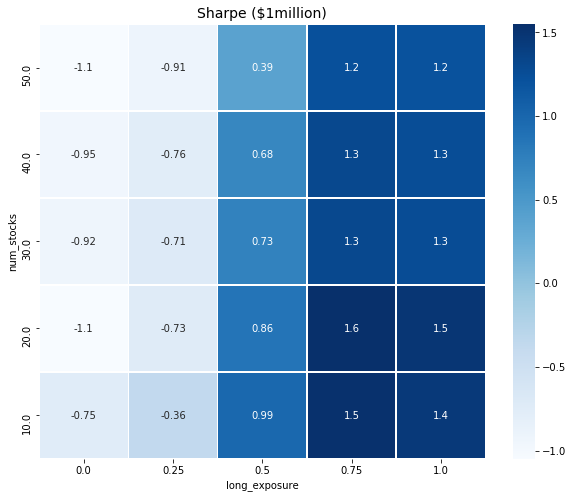

In [196]:
get_heatmap_plain_no_min_max(sharpe_1_mil, 'Sharpe', '1')

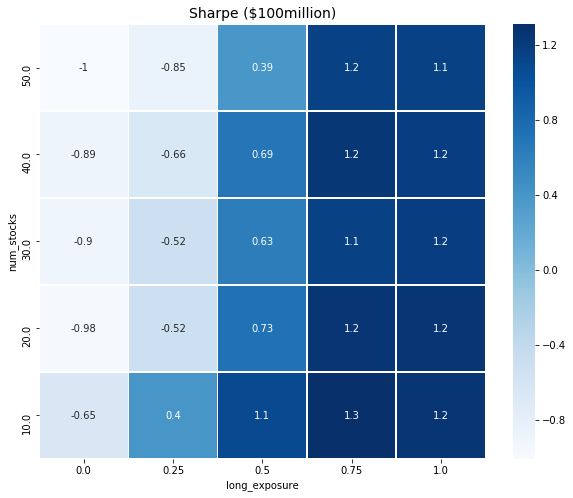

In [197]:
get_heatmap_plain_no_min_max(sharpe_100_mil, 'Sharpe', '100')

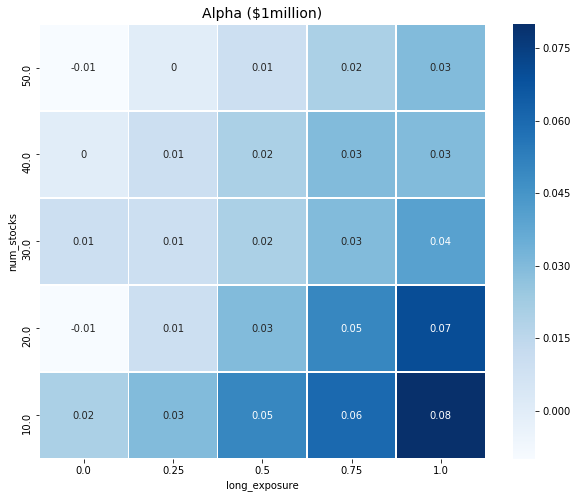

In [198]:
get_heatmap_plain_no_min_max(alpha_1_mil, 'Alpha', '1')

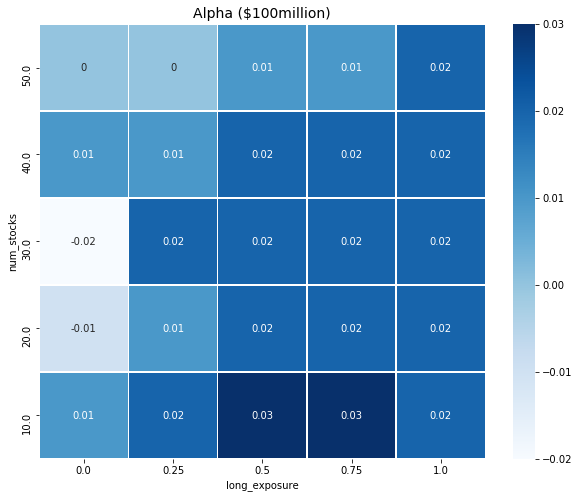

In [199]:
get_heatmap_plain_no_min_max(alpha_100_mil, 'Alpha', '100')

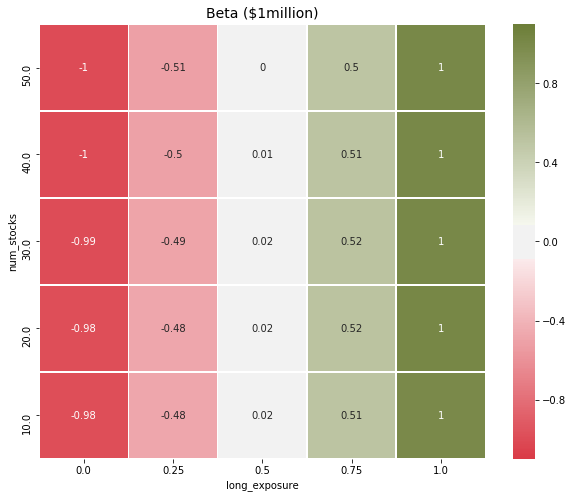

In [200]:
get_heatmap(beta_1_mil, 'Beta', '1', 10, 100, 1.1, -1.1)

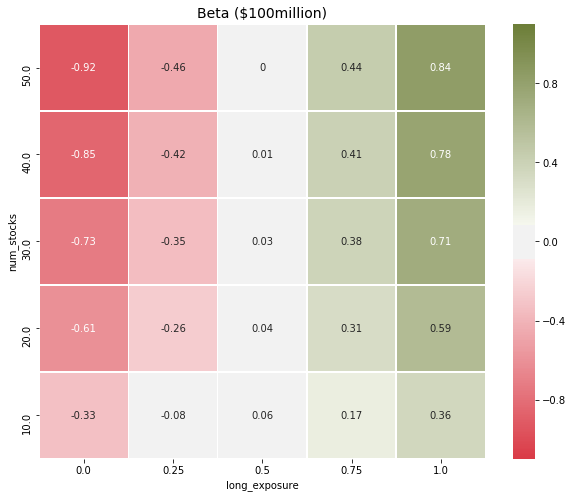

In [201]:
get_heatmap(beta_100_mil, 'Beta', '100', 10, 100, 1.1, -1.1)

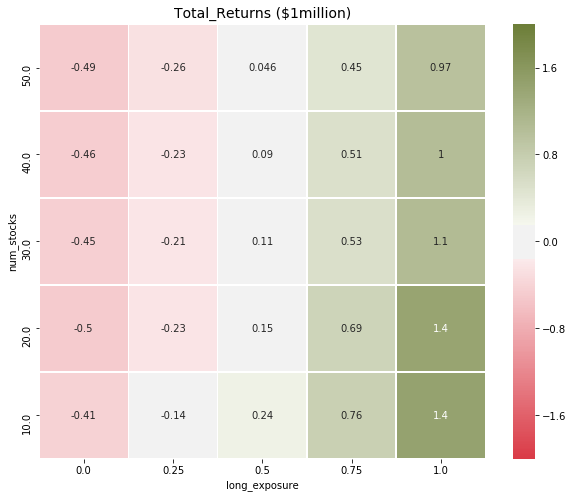

In [202]:
get_heatmap(total_r_1_mil, 'Total_Returns', '1', 10, 100, 2, -2)

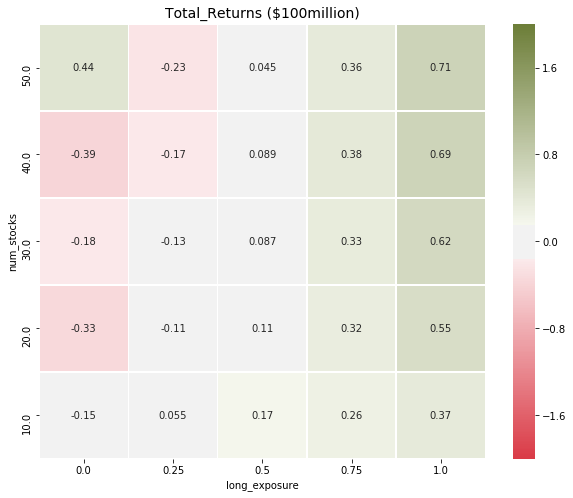

In [203]:
get_heatmap(total_r_100_mil, 'Total_Returns', '100', 10, 100, 2, -2)

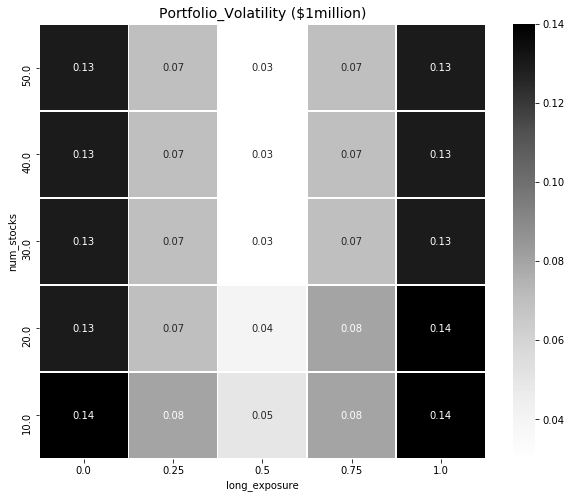

In [208]:
get_heatmap_plain_no_min_max_vol(vol_1_mil, 'Portfolio_Volatility', '1')

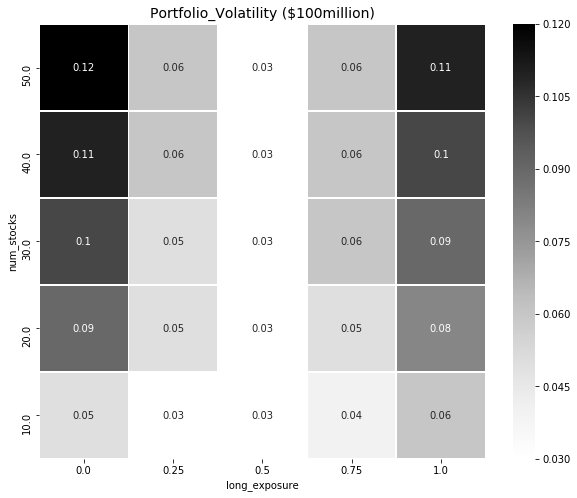

In [205]:
get_heatmap_plain_no_min_max_vol(vol_100_mil, 'Portfolio_Volatility', '100')

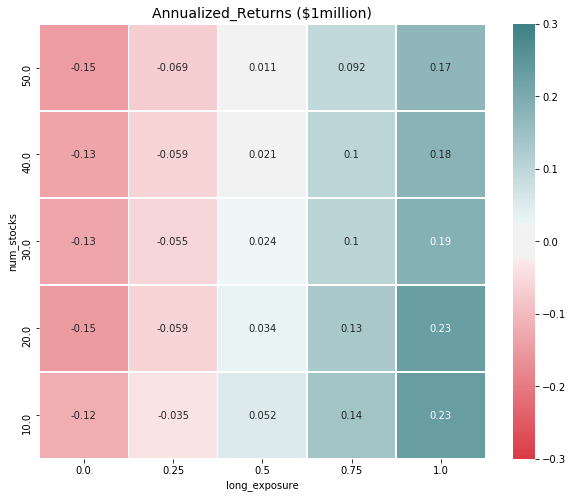

In [206]:
get_heatmap(annualized_1_mil, 'Annualized_Returns', '1', 10, 200, 0.3, -0.3)

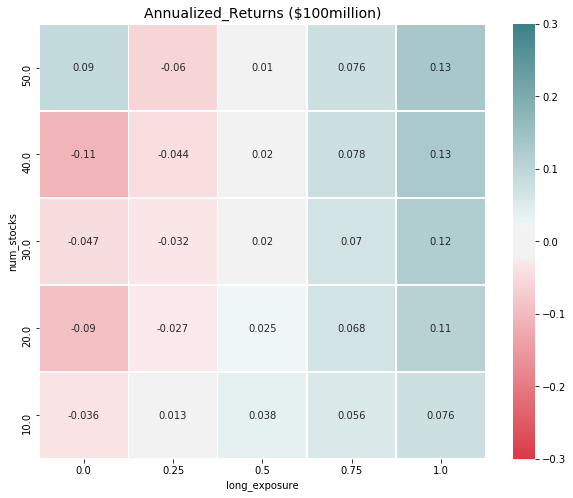

In [207]:
get_heatmap(annualized_100_mil, 'Annualized_Returns', '100', 10, 200, 0.3, -0.3)

# Get Three Columns for FF and HFRI graphs

In [210]:
research.head(2)

,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,max_drawdown,...,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade,annualized_returns
2842,3_15_fixing_PA1_dst_close_to_close_100mil_25,5aabd1fc9f85b44118c53491,0.0,-0.92,-1.01,-1.42,0.4430,0.7382,0.12,-0.4973,...,0.00,NaN,NaN,NaN,50.0,1.00,8/1/13,NaN,NaN,0.090120
2843,3_15_fixing_PA1_dst_close_to_close_100mil_24,5aabd1dde44121416442af58,0.0,-0.46,-0.85,-1.19,-0.2301,0.7382,0.06,-0.2715,...,0.25,NaN,NaN,NaN,50.0,0.75,8/1/13,NaN,NaN,-0.059674


In [211]:
one_mil_df = research[(research.algo_name.str.contains('3_15'))&(research.algo_name.str.contains('close_to_close_1mil'))]

In [212]:
len(one_mil_df)

25

In [213]:
one_mil_df.columns

Index(['algo_name', 'backtest_id', 'alpha', 'beta', 'sharpe', 'sortino',
       'total_returns', 'benchmark_returns', 'volatility', 'max_drawdown',
       'backtest_url', 'MAX_LONG_POSITION_SIZE', 'MAX_SHORT_POSITION_SIZE',
       'algo_file', 'bottom_pct_to_trade', 'capital', 'data_file', 'end_date',
       'event_impact_pos', 'event_relevance_cutoff', 'long_half',
       'long_sentiment_value', 'num_stocks_long', 'num_stocks_short',
       'num_stocks_to_trade', 'short_half', 'start_date',
       'top_bottom_pct_to_trade', 'top_pct_to_trade', 'annualized_returns'],
      dtype='object')

In [214]:
one_mil_df.drop(['algo_name', 'alpha', 'beta', 'sharpe',
       'sortino', 'total_returns', 'benchmark_returns', 'volatility',
       'max_drawdown', 'backtest_url', 
       'MAX_LONG_POSITION_SIZE', 'MAX_SHORT_POSITION_SIZE', 'algo_file',
       'bottom_pct_to_trade', 'capital', 'data_file', 'end_date',
       'event_impact_pos', 'event_relevance_cutoff', 
       'long_sentiment_value', 'num_stocks_long', 'num_stocks_short',
        'short_half', 'start_date',
       'top_bottom_pct_to_trade', 'top_pct_to_trade','annualized_returns'], axis = 1, inplace = True)

In [215]:
one_mil_df.head(2)

,backtest_id,long_half,num_stocks_to_trade
2867,5aabce93e44121416442af0e,0.00,50.0
2868,5aabce69e44121416442aeff,0.25,50.0


In [216]:
one_mil_df.to_csv(folder_path+'3_16_PA1_fixed_daily_sp500_four_metric_backtest_id_and_paramtrs_CTC.csv', index = False)


# 2_27_Generating anchor strategy for method_1

In [63]:
anchor = research.copy()

In [68]:
anchor[anchor['long_half']==0.5].sort_values('sharpe', ascending = False)

,Unnamed: 0,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,...,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade,annualized_returns
2804,2804,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_8,5a99d2a12ad8fd42fc0083a1,0.02,-0.03,0.47,0.68,0.0692,0.711,0.03,...,0.5,NaN,NaN,NaN,20.0,0.5,8/1/2013,NaN,NaN,0.015868
2803,2803,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_23,5a99d4788866354112ba715b,-0.01,-0.01,0.37,0.54,0.0343,0.711,0.02,...,0.5,NaN,NaN,NaN,50.0,0.5,8/1/2013,NaN,NaN,0.007967
2805,2805,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_3,5a99d2038866354112ba7104,0.02,-0.03,0.31,0.45,0.0635,0.711,0.05,...,0.5,NaN,NaN,NaN,10.0,0.5,8/1/2013,NaN,NaN,0.014591
2828,2828,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_28,5a9a0195df1f14422016c5ef,0.01,-0.03,0.26,0.38,0.0231,0.711,0.02,...,0.5,NaN,NaN,NaN,60.0,0.5,8/1/2013,NaN,NaN,0.005388
2806,2806,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_18,5a99d3dbf548a3414ca871d7,0.01,-0.02,0.12,0.17,0.0116,0.711,0.02,...,0.5,NaN,NaN,NaN,40.0,0.5,8/1/2013,NaN,NaN,0.002717
2807,2807,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_13,5a99d33f2ad8fd42fc0083b6,0.00,-0.02,0.04,0.05,0.0025,0.711,0.03,...,0.5,NaN,NaN,NaN,30.0,0.5,8/1/2013,NaN,NaN,0.000588
2829,2829,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_33,5a9a023268b71b428ac17c6c,0.00,-0.02,-0.07,-0.10,-0.0054,0.711,0.02,...,0.5,NaN,NaN,NaN,70.0,0.5,8/1/2013,NaN,NaN,-0.001273
2830,2830,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_38,5a9a02cf2ad8fd42fc008742,0.00,-0.01,-0.09,-0.12,-0.0052,0.711,0.01,...,0.5,NaN,NaN,NaN,80.0,0.5,8/1/2013,NaN,NaN,-0.001226
2831,2831,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_43,5a9a036d8866354112ba76f8,0.00,-0.01,-0.17,-0.23,-0.0073,0.711,0.01,...,0.5,NaN,NaN,NaN,90.0,0.5,8/1/2013,NaN,NaN,-0.001722
2832,2832,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_48,5a9a040a76fb6a40f42cd7de,0.00,-0.01,-0.30,-0.42,-0.0101,0.711,0.01,...,0.5,NaN,NaN,NaN,100.0,0.5,8/1/2013,NaN,NaN,-0.002386


In [67]:
anchor[anchor['long_half']==0.75].sort_values('sharpe', ascending = False)

,Unnamed: 0,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,...,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade,annualized_returns
2819,2819,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_32,5a9a021368b71b428ac17c64,0.01,0.52,1.16,1.66,0.3821,0.711,0.07,...,0.75,NaN,NaN,NaN,70.0,0.25,8/1/2013,NaN,NaN,0.079116
2820,2820,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_27,5a9a0175f548a3414ca87375,0.01,0.50,1.16,1.67,0.3727,0.711,0.06,...,0.75,NaN,NaN,NaN,60.0,0.25,8/1/2013,NaN,NaN,0.077385
2827,2827,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_37,5a9a02b047d81740fef0da7c,0.01,0.52,1.13,1.61,0.3609,0.710,0.06,...,0.75,NaN,NaN,NaN,80.0,0.25,8/1/2013,NaN,NaN,0.075198
2823,2823,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_47,5a9a03eb68b71b428ac17c88,0.00,0.51,1.11,1.58,0.3450,0.711,0.06,...,0.75,NaN,NaN,NaN,100.0,0.25,8/1/2013,NaN,NaN,0.072229
2793,2793,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_22,5a99d4588866354112ba7154,0.01,0.51,1.10,1.56,0.3606,0.711,0.07,...,0.75,NaN,NaN,NaN,50.0,0.25,8/1/2013,NaN,NaN,0.075142
2826,2826,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_42,5a9a034e2ad8fd42fc008748,0.00,0.51,1.07,1.51,0.3336,0.711,0.06,...,0.75,NaN,NaN,NaN,90.0,0.25,8/1/2013,NaN,NaN,0.070084
2795,2795,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_7,5a99d2822ad8fd42fc00839c,0.01,0.49,1.06,1.54,0.3731,0.711,0.07,...,0.75,NaN,NaN,NaN,20.0,0.25,8/1/2013,NaN,NaN,0.077458
2799,2799,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_17,5a99d3bc8866354112ba7149,0.00,0.50,0.97,1.36,0.3095,0.711,0.07,...,0.75,NaN,NaN,NaN,40.0,0.25,8/1/2013,NaN,NaN,0.065502
2800,2800,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_12,5a99d31f46cf3441b6b08440,0.00,0.51,0.94,1.34,0.3143,0.711,0.07,...,0.75,NaN,NaN,NaN,30.0,0.25,8/1/2013,NaN,NaN,0.066420
2802,2802,3_2_GMO_daily_cut_close_to_close_sum_event_sentiment_sp500_1mil_2,5a99d1e55d8e1d422dfcf787,0.00,0.51,0.80,1.14,0.3225,0.711,0.08,...,0.75,NaN,NaN,NaN,10.0,0.25,8/1/2013,NaN,NaN,0.067981


# Check ranking

In [90]:
check_rank_anchor_pa1 = all_strats[all_strats['algo_name'].str.contains('2_21')]

In [92]:
check_rank_anchor_pa1_ = check_rank_anchor_pa1[check_rank_anchor_pa1['long_half'] == 0.5]

In [93]:
check_rank_anchor_pa1_

,Unnamed: 0,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,...,event_relevance_cutoff,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade
939,939,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_100mil_fixed_23,5a8e4ec5704e6d4203363062,0.02,-0.01,0.67,0.97,0.0754,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,50.0,0.5,8/1/2013,NaN,NaN
944,944,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_100mil_fixed_18,5a8e4e29ec704b4587b479dd,0.03,-0.02,0.95,1.39,0.1165,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,40.0,0.5,8/1/2013,NaN,NaN
949,949,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_100mil_fixed_13,5a8e4d8ccaba9544051afc9e,0.03,-0.01,0.97,1.43,0.1294,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,30.0,0.5,8/1/2013,NaN,NaN
954,954,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_100mil_fixed_8,5a8e4cf0b0b706419a91dd04,0.03,-0.01,0.85,1.25,0.1385,0.711,0.04,...,NaN,0.5,NaN,NaN,NaN,20.0,0.5,8/1/2013,NaN,NaN
959,959,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_100mil_fixed_3,5a8e4c5359b7fb4719c074d9,0.09,0.00,1.95,3.14,0.4499,0.711,0.04,...,NaN,0.5,NaN,NaN,NaN,10.0,0.5,8/1/2013,NaN,NaN
964,964,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_1mil_fixed_23,5a8e4bb6f85cf0433c56128c,0.02,-0.02,0.75,1.11,0.0876,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,50.0,0.5,8/1/2013,NaN,NaN
969,969,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_1mil_fixed_18,5a8e4b167bb6a445e38a02e6,0.03,-0.01,1.04,1.53,0.1314,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,40.0,0.5,8/1/2013,NaN,NaN
974,974,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_1mil_fixed_13,5a8e4a74fe0d7c47edcfd8b8,0.04,-0.01,1.15,1.71,0.1620,0.711,0.03,...,NaN,0.5,NaN,NaN,NaN,30.0,0.5,8/1/2013,NaN,NaN
979,979,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_1mil_fixed_8,5a8e49d7704e6d4203362fed,0.04,-0.02,1.08,1.60,0.1878,0.711,0.04,...,NaN,0.5,NaN,NaN,NaN,20.0,0.5,8/1/2013,NaN,NaN
984,984,2_21_trimmed_four_metric_daily_sp500_for_new_presentation_slides_1mil_fixed_3,5a8e493a905e914232b1bd38,0.08,-0.02,1.60,2.54,0.4080,0.711,0.05,...,NaN,0.5,NaN,NaN,NaN,10.0,0.5,8/1/2013,NaN,NaN


In [9]:
(1+0.5676)**(1/4.5)

1.1050593720121986

# Take a look at the strat_summary

In [2]:
all_strat_results_path = '/Users/Brad Sun/Dropbox/ACCERN/json_backtest_record/results/all_strat_results_by_3_4.csv'
all_strat_configs_path = '/Users/Brad Sun/Dropbox/ACCERN/json_backtest_record/configs/all_strat_configs_by_3_4.csv'
strat_summry_output_path = '/Users/Brad Sun/Dropbox/ACCERN/json_backtest_record/strat_summaries/strat_summary_by_2_28.csv'

In [4]:
strat_summary = pd.read_csv(strat_summry_output_path)

In [6]:
weekly_fixed_3_1 = strat_summary[strat_summary['algo_name'].str.contains('2_28')]

In [8]:
weekly_fixed_3_1[(weekly_fixed_3_1['long_half'] == 0.75)&(weekly_fixed_3_1['num_stocks_to_trade']==30)]

,Unnamed: 0,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,...,event_relevance_cutoff,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade
1264,1264,2_28_fixed_four_metric_weekly_sp500_method1_1mil_12,5a977e413b2c0741e8128b82,0.04,0.50,1.47,2.13,0.5676,0.711,0.07,...,NaN,0.75,NaN,NaN,NaN,30.0,0.25,8/1/2013,NaN,NaN
1265,1265,2_28_fixed_four_metric_weekly_sp500_method1_100mil_12,5a97814d54957942afa08e1c,0.04,0.49,1.44,2.09,0.5365,0.711,0.07,...,NaN,0.75,NaN,NaN,NaN,30.0,0.25,8/1/2013,NaN,NaN


# Show case

In [3]:
show_ = pd.read_csv('/Users/Brad Sun/Dropbox/ACCERN/json_backtest_record/strat_summaries/strat_summary_by_3_4.csv')

In [5]:
show_

,Unnamed: 0,algo_name,backtest_id,alpha,beta,sharpe,sortino,total_returns,benchmark_returns,volatility,...,event_relevance_cutoff,long_half,long_sentiment_value,num_stocks_long,num_stocks_short,num_stocks_to_trade,short_half,start_date,top_bottom_pct_to_trade,top_pct_to_trade
0,0,1_11_conquest_spy_monthly_28,5a59286b466247436e2f769c,0.00,0.70,0.92,1.33,0.4644,0.711,0.10,...,60.0,NaN,10.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
1,1,1_11_conquest_spy_monthly_26,5a5927efb0aa06452e61276f,0.03,0.43,1.09,1.58,0.4298,0.711,0.08,...,80.0,NaN,10.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
2,2,1_11_conquest_spy_monthly_24,5a5927ac466247436e2f766c,0.00,0.24,0.48,0.68,0.1223,0.711,0.06,...,60.0,NaN,20.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
3,3,1_11_conquest_spy_monthly_22,5a592762466247436e2f7658,-0.01,0.17,0.29,0.40,0.0580,0.711,0.05,...,80.0,NaN,20.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
4,4,1_11_conquest_spy_monthly_20,5a59271b0247a7439dfd5920,-0.02,0.10,-0.08,-0.11,-0.0162,0.711,0.04,...,60.0,NaN,30.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
5,5,1_11_conquest_spy_monthly_19,5a5926fb13533b439cf59aa1,-0.02,0.10,-0.08,-0.11,-0.0162,0.711,0.04,...,70.0,NaN,30.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
6,6,1_11_conquest_spy_monthly_18,5a5926da0247a7439dfd5915,-0.02,0.09,-0.22,-0.28,-0.0359,0.711,0.04,...,80.0,NaN,30.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
7,7,1_11_conquest_spy_monthly_16,5a59269ce6b17c436dec285c,-0.02,0.06,-0.54,-0.64,-0.0678,0.711,0.03,...,60.0,NaN,40.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
8,8,1_11_conquest_spy_monthly_15,5a59267ae6b17c436dec2856,-0.02,0.06,-0.54,-0.64,-0.0678,0.711,0.03,...,70.0,NaN,40.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
9,9,1_11_conquest_spy_monthly_14,5a59265a55324944402774c5,-0.02,0.06,-0.54,-0.64,-0.0678,0.711,0.03,...,80.0,NaN,40.0,NaN,NaN,NaN,NaN,8/1/2013,NaN,NaN
